In [1]:
import numpy as mp
import pandas as pd
import os

In [2]:
path = './Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_month_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+ '/'+ file)
    all_month_data = pd.concat([all_month_data, current_data])
    
all_month_data.to_csv('all_data_copy.csv', index= False)

In [3]:
all_data = pd.read_csv('all_data_copy.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#Drop rows with NAN

In [5]:
nan_df = all_data[all_data.isna().any(axis = 1)]

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
#get rid of text in order col

In [7]:
all_data = all_data[all_data['Order Date'].str[:2]!='Or']

In [8]:
#make cols correct type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [10]:
#Augment data with additional columns
# add month

In [11]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
#adding city col
# first we need to exract city from address
#second add city col

In [13]:
def get_city(address):
    return address.split(',')[1].strip(" ")

def get_state(address):
    return address.split(',')[2].strip(" ")[1]


In [14]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (X)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (A)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A)


In [15]:
##Data exploration

In [16]:
#Q1: What was the best month for sales? How much was earned that month?

In [17]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int')* all_data['Price Each'].astype('float')

In [18]:
all_data.groupby(['Month']).sum()

C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\2731398678.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])


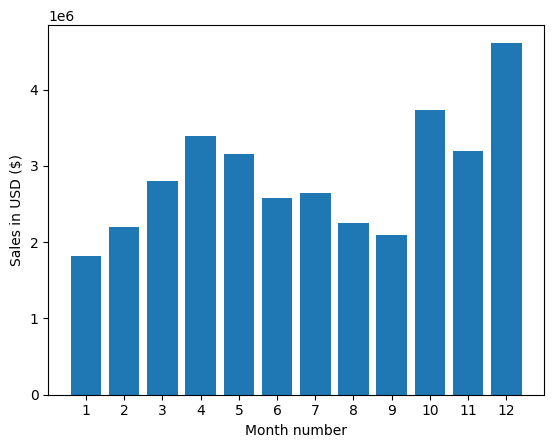

In [19]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [20]:
#which city had the best sales

In [21]:
all_data.groupby(['City']).sum()

C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (A),16602,2779908.20,104794,2795498.58
Austin (X),11153,1809873.61,69829,1819581.75
Boston (A),22528,3637409.77,141112,3661642.01
Dallas (X),16730,2752627.82,104620,2767975.40
Los Angeles (A),33289,5421435.23,208325,5452570.80
New York City (Y),27932,4635370.83,175741,4664317.43
Portland (E),2750,447189.25,17144,449758.27
Portland (R),11303,1860558.22,70621,1870732.34
San Francisco (A),50239,8211461.74,315520,8262203.91


C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\3398284522.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\3398284522.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])


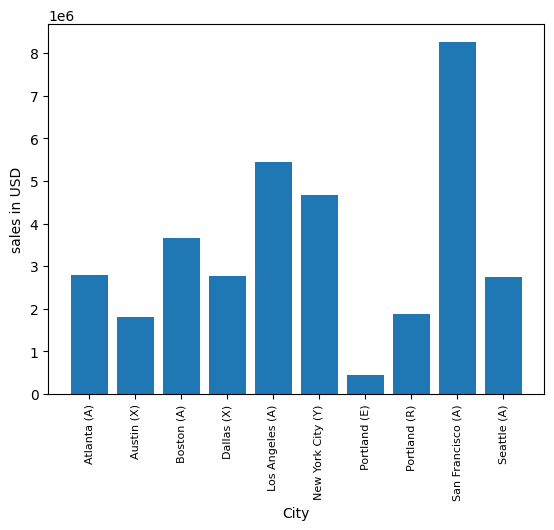

In [22]:
keys = [city for city, df in all_data.groupby(['City'])]


plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.xlabel('City')
plt.ylabel('sales in USD')
plt.xticks(keys, rotation = 'vertical', size = 8)
plt.show()

In [23]:
all_data.groupby(['City']).sum()['Sales']

C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\4068187894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()['Sales']


City
Atlanta (A)          2795498.58
Austin (X)           1819581.75
Boston (A)           3661642.01
Dallas (X)           2767975.40
Los Angeles (A)      5452570.80
New York City (Y)    4664317.43
Portland (E)          449758.27
Portland (R)         1870732.34
San Francisco (A)    8262203.91
Seattle (A)          2747755.48
Name: Sales, dtype: float64

In [24]:
#Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (X),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (A),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A),11.99


In [26]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date'], format= '%m/%d/%y %H:%M').dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date'], format= '%m/%d/%y %H:%M').dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (X),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (A),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (A),11.99,9,27,1


C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\2136160572.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


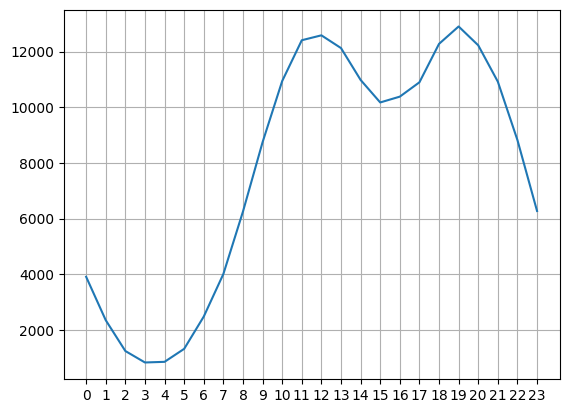

In [27]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]


plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)

plt.grid()
plt.show()

In [28]:
#Question 4: What products are most often sold together?

In [29]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\4077873097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [30]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [31]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
#What product sold the most? Why do you think it sold the most?

C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\2432927678.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


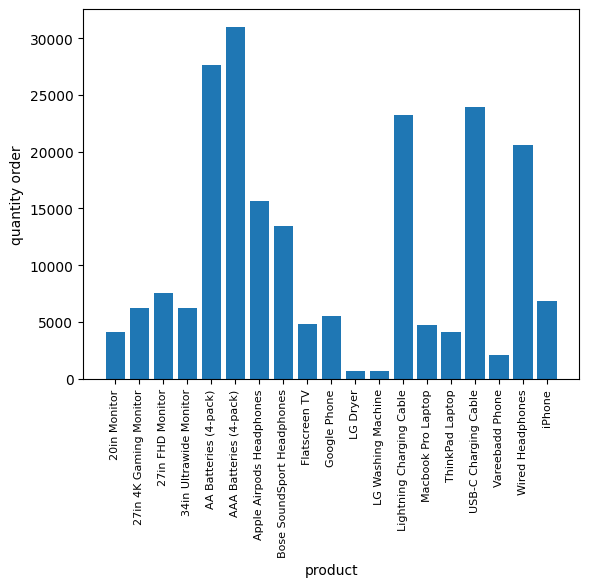

In [36]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('product')
plt.ylabel('quantity order')
plt.show()


C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\1793099359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\DFR\AppData\Local\Temp\ipykernel_12520\1793099359.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 'vertical', size= 8)


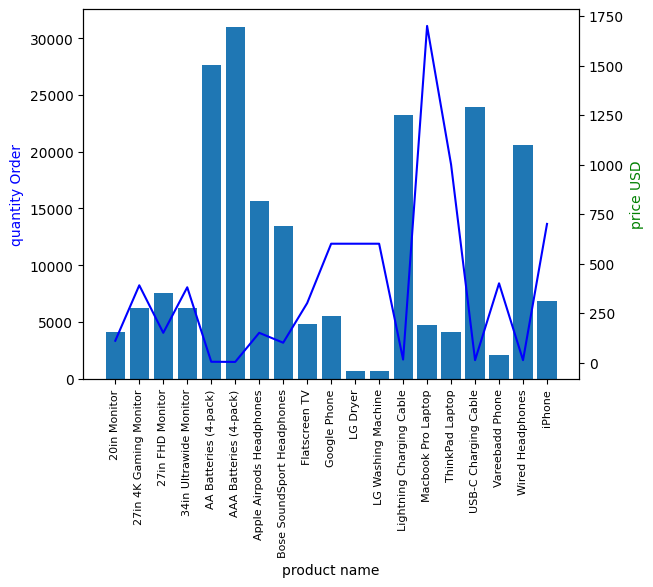

In [43]:
prices = all_data.groupby('Product').mean()['Price Each']


ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, color ='b')

ax1.set_xlabel('product name')
ax1.set_ylabel('quantity Order', color = 'b')

ax2.set_ylabel('price USD', color = 'g')
ax1.set_xticklabels(products, rotation= 'vertical', size= 8)


plt.show()